# Preliminaries

In [2]:
import sys
import os

# Set the PYTHONPATH to the project root
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [3]:
from src.DFA.BinaryAdditionDFA import BinaryAdditionDFA
from src.bilinear.config import TrainConfig
from src.bilinear.train_bilinear import train_bilinear
from src.bilinear.inference_bilinear import inference_bilinear
from src.bilinear.bilinear_function import BilinearFunction
from src.utils.visualizations import plot_loss, plot_losses, visualize_metrics, metrics_by_length

import torch
import torch.nn as nn

# Train

In [4]:
alphabet = BinaryAdditionDFA.alphabet + ['<', '>']
states = BinaryAdditionDFA.states + ['<START>', '<ACCEPT>', '<REJECT>']

model = BilinearFunction(alphabet, states)
config = TrainConfig(DFA=BinaryAdditionDFA, 
                        criterion = nn.CrossEntropyLoss(),
                        num_epochs = 400,
                        lr = 0.1,
                        example_length = 4,
                        l1_penalty = 0.001
                        )
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

train_loss, train_ce_loss, train_l1_loss = train_bilinear(model, optimizer, config)

/Users/sarahbentley/dfa_transformer/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/400, Avg Training Loss: 2.0715094010035195
Epoch 2/400, Avg Training Loss: 1.934081792831421
Epoch 3/400, Avg Training Loss: 1.7630988756815593
Epoch 4/400, Avg Training Loss: 1.6108988523483276
Epoch 5/400, Avg Training Loss: 1.4205366671085358
Epoch 6/400, Avg Training Loss: 1.3166614572207134
Epoch 7/400, Avg Training Loss: 0.9307028353214264
Epoch 8/400, Avg Training Loss: 0.7560238639513651
Epoch 9/400, Avg Training Loss: 1.085872158408165
Epoch 10/400, Avg Training Loss: 1.127309153477351
Epoch 11/400, Avg Training Loss: 0.9240036954482397
Epoch 12/400, Avg Training Loss: 0.7630857676267624
Epoch 13/400, Avg Training Loss: 0.42849765717983246
Epoch 14/400, Avg Training Loss: 0.538200631737709
Epoch 15/400, Avg Training Loss: 0.506292333205541
Epoch 16/400, Avg Training Loss: 0.49102098246415454
Epoch 17/400, Avg Training Loss: 0.43190161883831024
Epoch 18/400, Avg Training Loss: 0.35362517088651657
Epoch 19/400, Avg Training Loss: 0.49819789081811905
Epoch 20/400, Avg Tra

# Evaluation

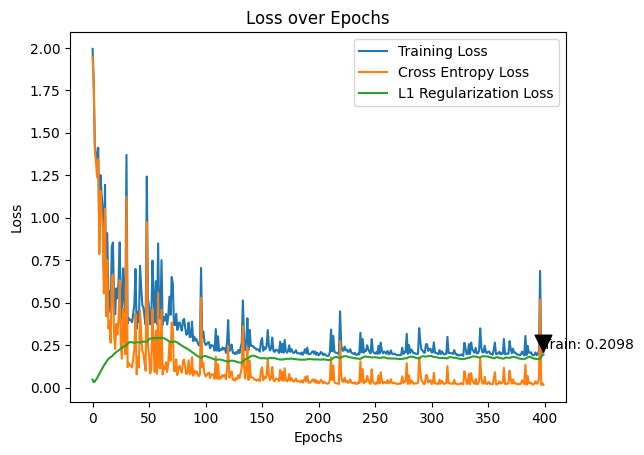

In [6]:
plot_losses(train_loss, train_ce_loss, train_l1_loss)

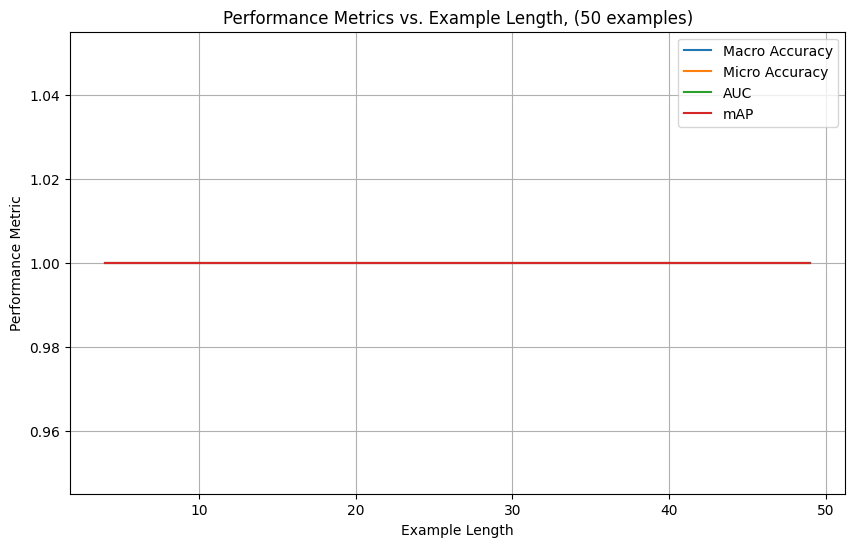

In [8]:
metrics_by_length(model, inference_bilinear, BinaryAdditionDFA, example_lengths = [i for i in range(4, 50)], num_examples=50)

<Figure size 1000x500 with 0 Axes>

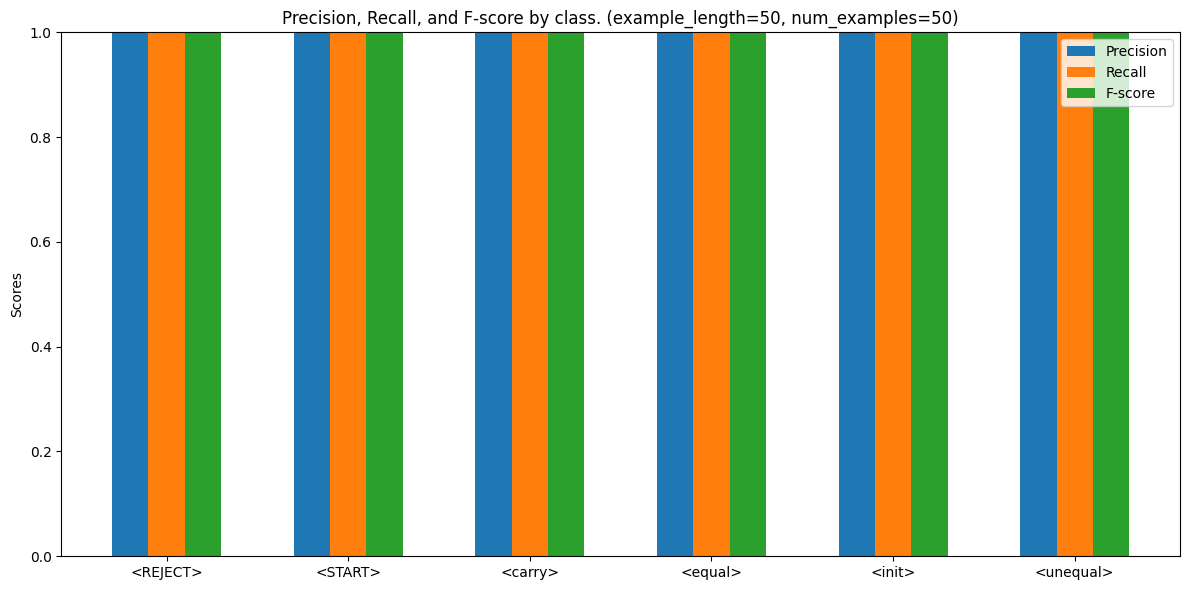

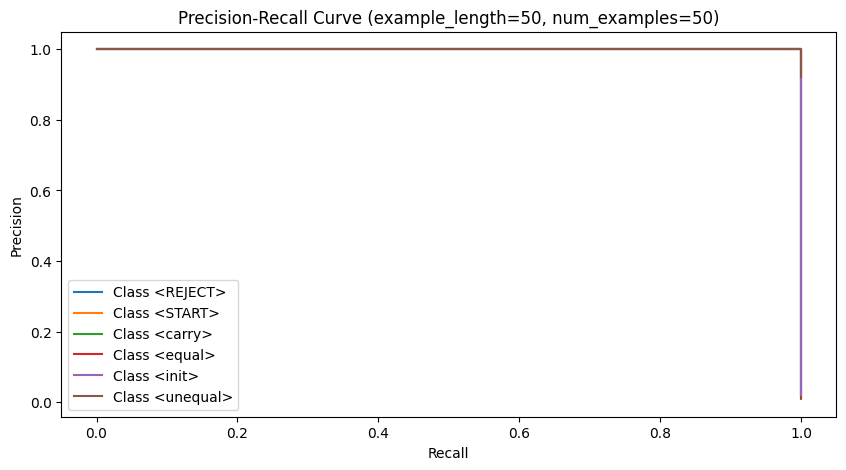

In [10]:
example_length=50
num_examples=50
DFA_outputs, learner_outputs = inference_bilinear(model, BinaryAdditionDFA, example_length, num_examples)
visualize_metrics(DFA_outputs, learner_outputs, example_length, num_examples)